# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


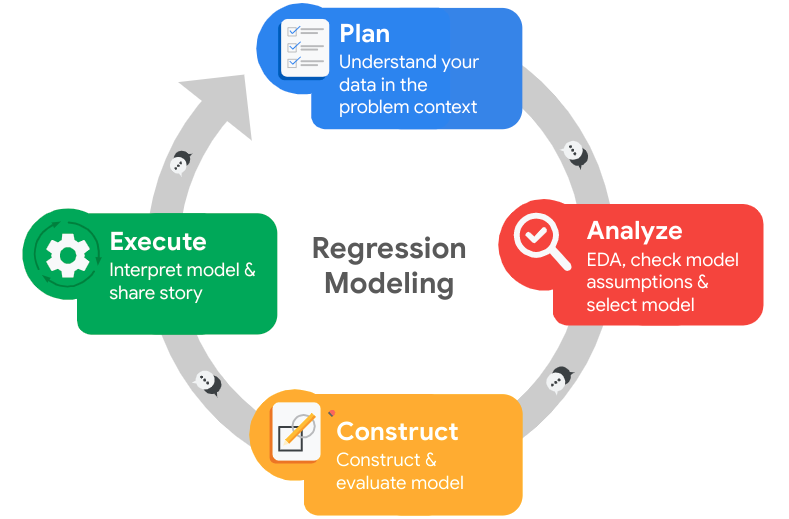

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
# For data manipulation
import pandas as pd
import numpy as np

# For data visualisation
import matplotlib.pyplot as plt
import seaborn as sns


# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe(include = "all")

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0['last_pro_evaluation']=df0['last_evaluation']
del df0['last_evaluation']

df0['work_accident']=df0['Work_accident']
del df0['Work_accident']

df0['department']=df0['Department']
del df0['Department']

df0['tenure']=df0['time_spend_company']
del df0['time_spend_company']

df0['average_monthly_hours']=df0['average_montly_hours']
del df0['average_montly_hours']


# Display all column names after the update
### YOUR CODE HERE ###
df0.dtypes

satisfaction_level       float64
number_project             int64
left                       int64
promotion_last_5years      int64
salary                    object
last_pro_evaluation      float64
work_accident              int64
department                object
tenure                     int64
average_monthly_hours      int64
dtype: object

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isnull().sum()

satisfaction_level       0
number_project           0
left                     0
promotion_last_5years    0
salary                   0
last_pro_evaluation      0
work_accident            0
department               0
tenure                   0
average_monthly_hours    0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().value_counts()

False    11991
True      3008
dtype: int64

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
duplicate = df0.duplicated()
df_duplicate = df0[duplicate]
df_duplicate.head(10)

,satisfaction_level,number_project,left,promotion_last_5years,salary,last_pro_evaluation,work_accident,department,tenure,average_monthly_hours
396,0.46,2,1,0,low,0.57,0,sales,3,139
866,0.41,2,1,0,low,0.46,0,accounting,3,128
1317,0.37,2,1,0,medium,0.51,0,sales,3,127
1368,0.41,2,1,0,low,0.52,0,RandD,3,132
1461,0.42,2,1,0,low,0.53,0,sales,3,142
1516,0.40,2,1,0,low,0.50,0,IT,3,127
1616,0.37,2,1,0,low,0.46,0,sales,3,156
1696,0.39,2,1,0,low,0.56,0,sales,3,160
1833,0.10,6,1,0,low,0.85,0,sales,4,266
12000,0.38,2,1,0,low,0.53,0,sales,3,157


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df = df0.drop_duplicates(subset = None, keep = 'first', inplace = False)

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df.head(10)
df.shape

(11991, 10)

### Check outliers

Check for outliers in the data.

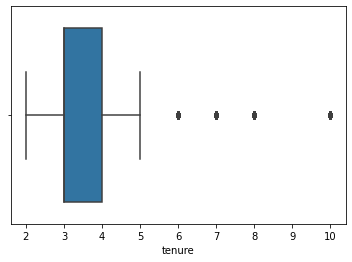

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

# sns.boxplot(data=df, x= "satisfaction_level") # no outliers

# sns.boxplot(data=df, x= "number_project") # no outliers

# sns.boxplot(data=df, x= "average_montly_hours") # no outliers

sns.boxplot(data=df, x= "tenure") # outliers

# sns.boxplot(data=df, x= "last_pro_evaluation") # no outliers

In [73]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

percentile25 = df['tenure'].quantile(0.25)

percentile75 = df['tenure'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr

print("upper_limit is: ",upper_limit)

upper_limit is:  5.5


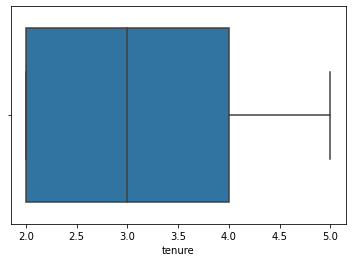

In [74]:
mask = (df['tenure'] <= upper_limit)

df = df[mask].copy()

sns.boxplot(data=df, x= "tenure")

In [75]:
# Convert object into int
## Convert department into numbers
df['department'].unique()
department_number = {1:'sales',2:'accounting',3:'hr',4:'technical',5:'support',6:'management',7:'IT',8:'product_mng',9:'marketing',10:'RandD'}


## Convert salary into numbers

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [12]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
df.groupby(by="left").count()
# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
left_percent = 1882 / (1882+9285) *100
stay_percent = 9285 / (1882+9285) *100

print(f"Percentage of leaving employee: {left_percent:.2f}%")
print(f"Percentage of staying employee: {stay_percent:.2f}%")

Percentage of leaving employee: 16.85%
Percentage of staying employee: 83.15%


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [16]:
data_majority = df[df["left"] == "0"]
data_minority = df[df["left"] == "1"]

# Upsample the minority class (which is "verified")
data_minority_upsampled = resample(data_minority,
                                 replace=True,                 # to sample with replacement
                                 n_samples=len(data_majority), # to match majority class
                                 random_state=0)               # to create reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

# Display new class counts
data_upsampled["left"].value_counts()

NameError: name 'resample' is not defined

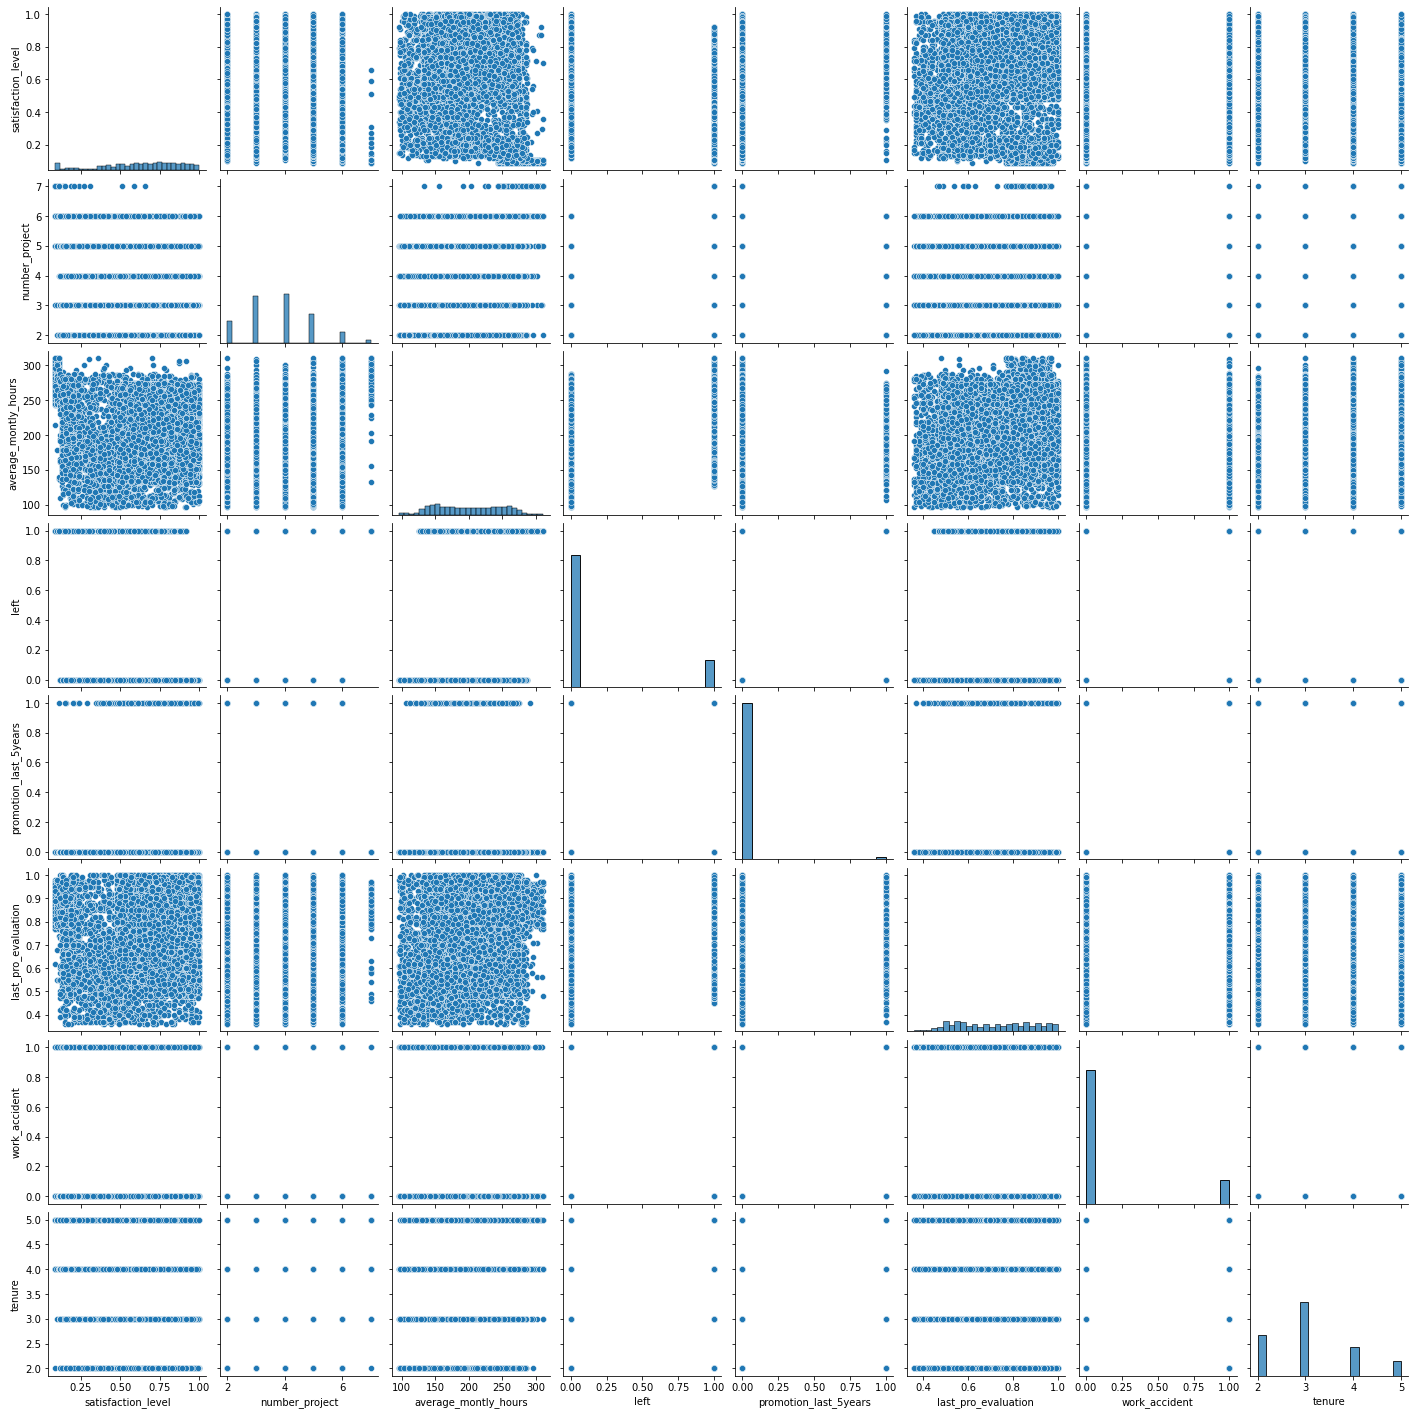

In [77]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.pairplot(df)

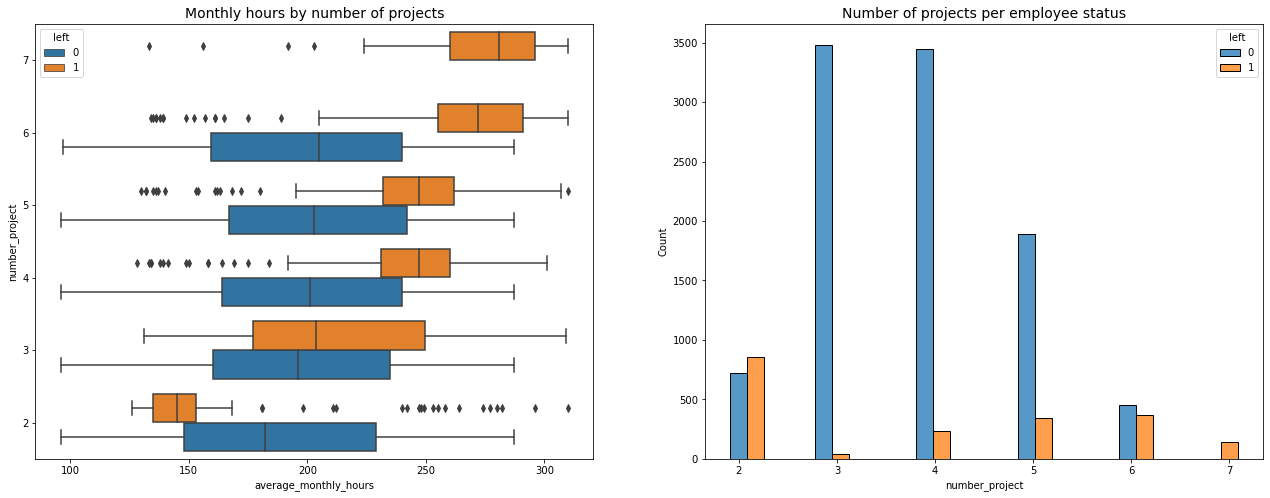

In [29]:
# Create a plot as needed
### YOUR CODE HERE ###
# Create boxplot comparing "average monthly hours" distribution for "number of project" for staying and left employees
fig, ax = plt.subplots(1,2,figsize = (22,8))
sns.boxplot(data=df, x="average_monthly_hours", y="number_project", hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize ='14')

# Create histogram of "numbers of project" per employee who left and stay
tenure_stay = df[df["left"]==0]['number_project']
tenure_left = df[df['left']==1]['number_project']
sns.histplot(data=df, x="number_project",hue = 'left', multiple = 'dodge', shrink = 2, ax=ax[1])
ax[1].set_title('Number of projects per employee status', fontsize='14')

plt.show()


In [14]:
# Create a plot as needed
### YOUR CODE HERE ###
df[df['number_project']==7]['left'].value_counts()

1    145
Name: left, dtype: int64

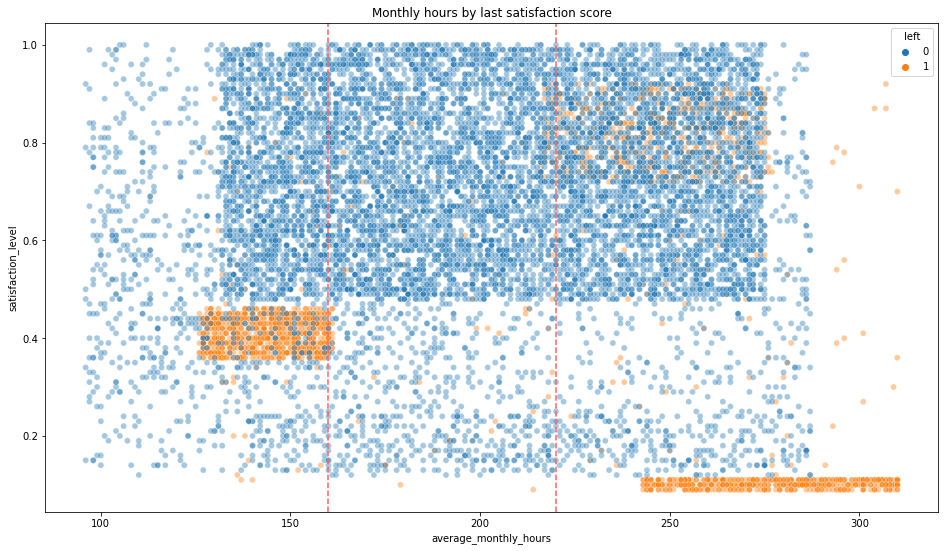

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###

plt.figure(figsize=(16,9))
sns.scatterplot(data=df, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.title('Monthly hours by last satisfaction score')
plt.axvline(x=160, color='#ff6361', label='160 hrs./mo.', ls='--')
plt.axvline(x=220, color='#ff6361', label='220 hrs./mo.', ls='--')

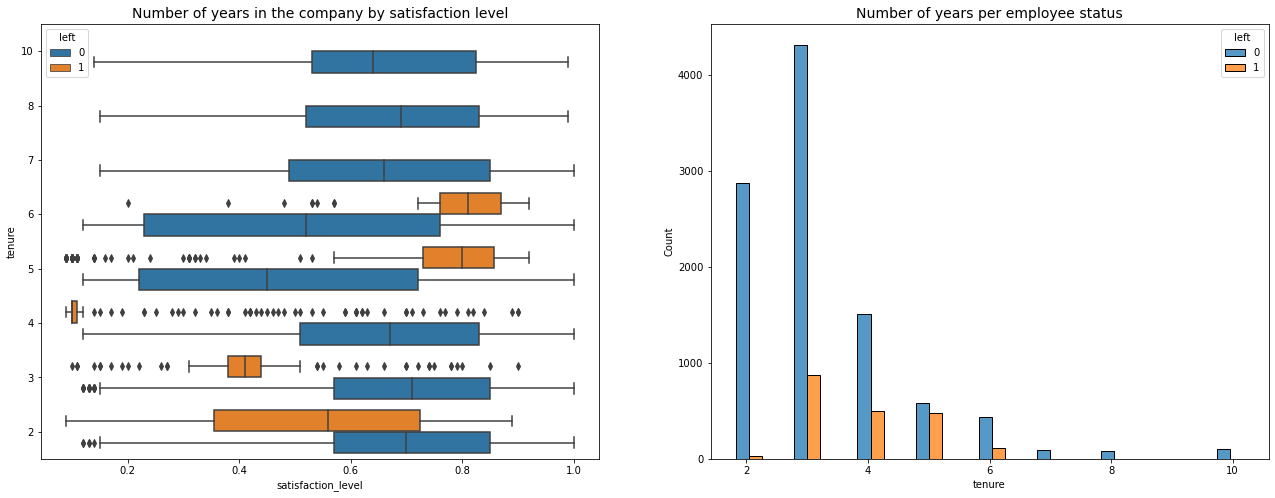

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1,2,figsize = (22,8))

# Satisfaction level by time spend company
sns.boxplot(data=df, x="satisfaction_level", y="tenure", hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Number of years in the company by satisfaction level', fontsize ='14')

# Create histogram of "numbers of project" per employee who left and stay
tenure_stay = df[df["left"]==0]['tenure']
tenure_left = df[df['left']==1]['tenure']
sns.histplot(data=df, x="tenure",hue = 'left', multiple = 'dodge', shrink = 5, ax=ax[1])
ax[1].set_title('Number of years per employee status', fontsize='14')

plt.show()

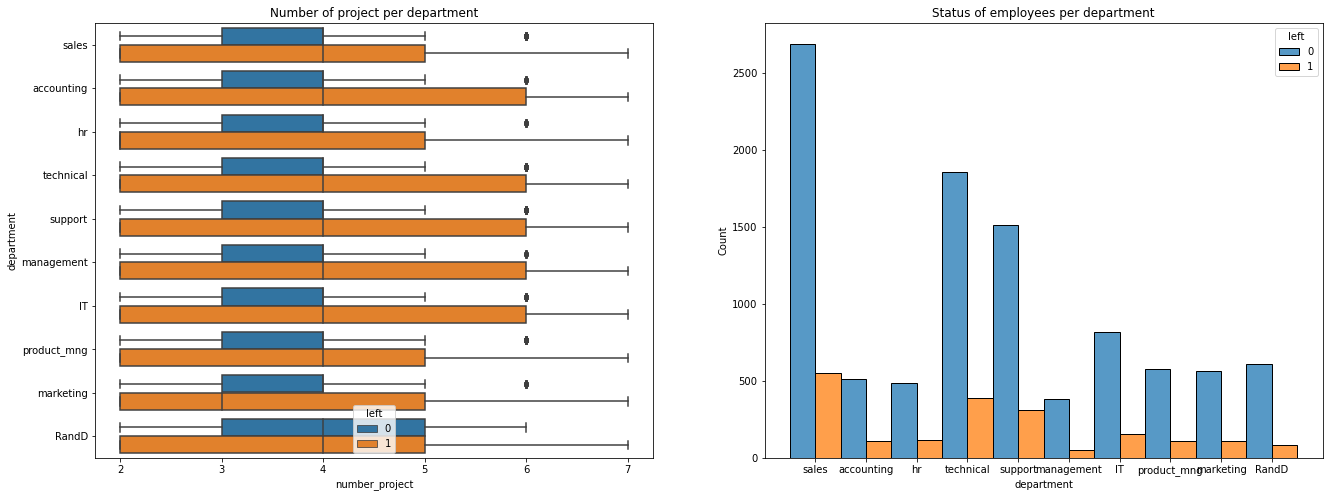

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###

fig, ax = plt.subplots(1,2,figsize=(22,8))

# Number of project by department
sns.boxplot(data=df, x="number_project", y='department', hue='left', orient = 'h', ax=ax[0])
ax[0].set_title("Number of project per department")

# Left by department
sns.histplot(data=df, x='department', hue = 'left', multiple = 'dodge', shrink = 1, ax=ax[1])
ax[1].set_title("Status of employees per department")


plt.show()

In [20]:
df.groupby(by='department').count()

,satisfaction_level,number_project,left,promotion_last_5years,salary,last_pro_evaluation,work_accident,tenure,average_monthly_hours
department,,,,,,,,,
IT,976,976,976,976,976,976,976,976,976
RandD,694,694,694,694,694,694,694,694,694
accounting,621,621,621,621,621,621,621,621,621
hr,601,601,601,601,601,601,601,601,601
management,436,436,436,436,436,436,436,436,436
marketing,673,673,673,673,673,673,673,673,673
product_mng,686,686,686,686,686,686,686,686,686
sales,3239,3239,3239,3239,3239,3239,3239,3239,3239
support,1821,1821,1821,1821,1821,1821,1821,1821,1821


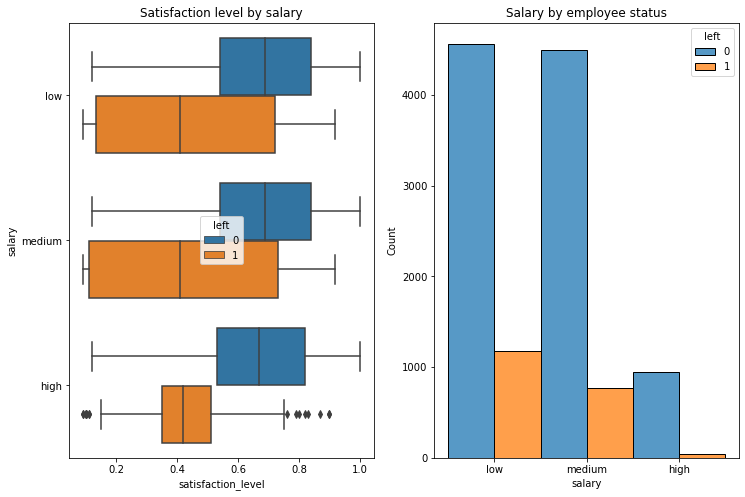

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1,2,figsize=(12,8))

# satisfaction by salary
sns.boxplot(data=df, x = 'satisfaction_level', y ='salary', hue='left', ax=ax[0])
ax[0].set_title('Satisfaction level by salary')

# left by salary
sns.histplot(data=df, x='salary', hue = 'left', multiple = 'dodge', ax=ax[1])
ax[1].set_title('Salary by employee status')

plt.show()

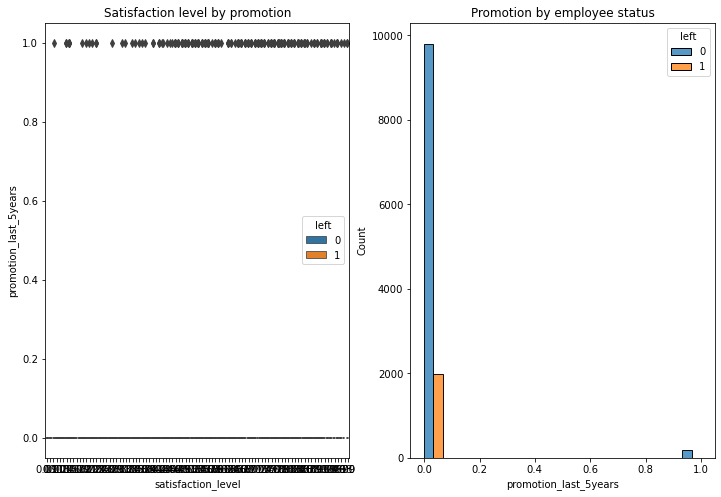

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1,2,figsize=(12,8))

# satisfaction by promotion
sns.boxplot(data=df, x = 'satisfaction_level', y ='promotion_last_5years', hue='left', ax=ax[0])
ax[0].set_title('Satisfaction level by promotion')

# left by promotion
sns.histplot(data=df, x='promotion_last_5years', hue = 'left', multiple = 'dodge', ax=ax[1])
ax[1].set_title('Promotion by employee status')

plt.show()

In [23]:
df[df['promotion_last_5years']==1]['left'].value_counts()

0    195
1      8
Name: left, dtype: int64

In [24]:
df[(df['promotion_last_5years'] == 1) & (df['left'] == 1)]['salary'].value_counts()

low       5
medium    3
Name: salary, dtype: int64

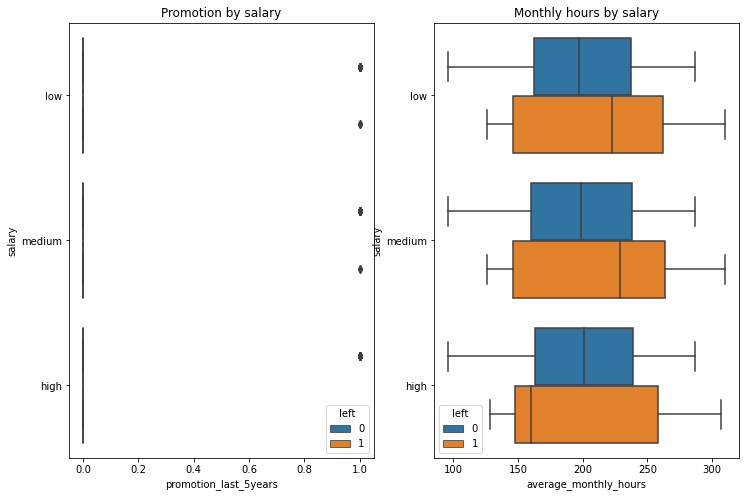

In [25]:
# Create a plot as needed
### YOUR CODE HERE ###

fig, ax = plt.subplots(1,2,figsize=(12,8))

# promotion by salary
sns.boxplot(data=df, x = 'promotion_last_5years', y ='salary', hue='left', ax=ax[0])
ax[0].set_title('Promotion by salary')

# Salary by average hours monthly
sns.boxplot(data=df, x = 'average_monthly_hours', y ='salary', hue='left', ax=ax[1])
ax[1].set_title('Monthly hours by salary')

plt.show()

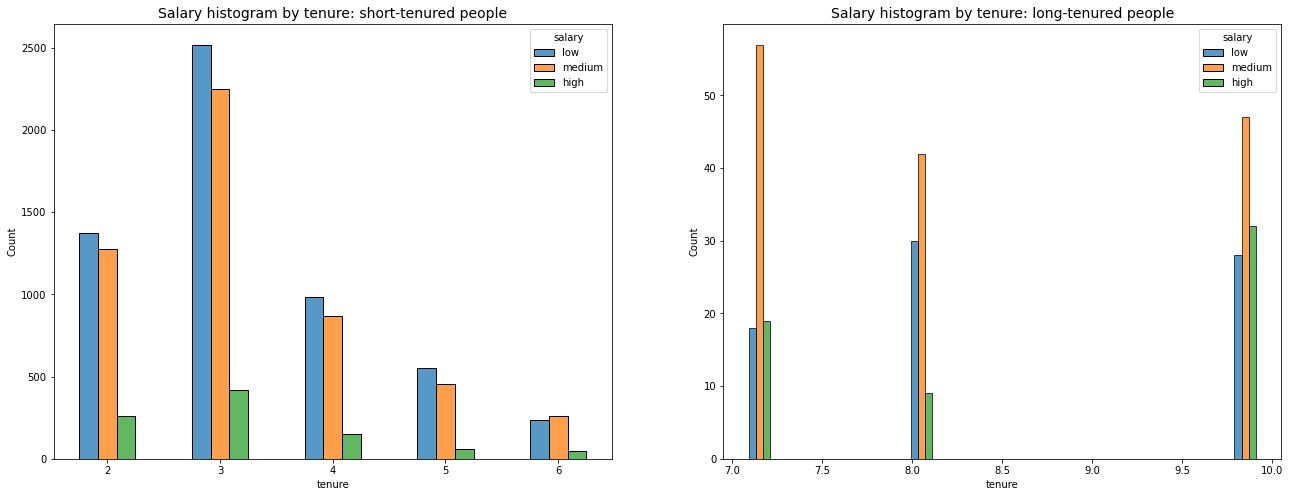

In [26]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df[df['tenure'] < 7]

# Define long-tenured employees
tenure_long = df[df['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

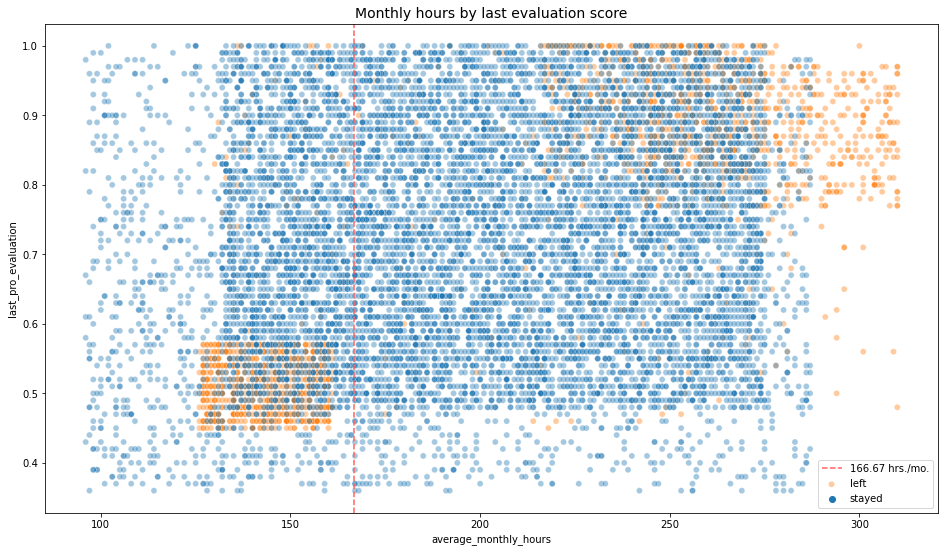

In [27]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='average_monthly_hours', y='last_pro_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

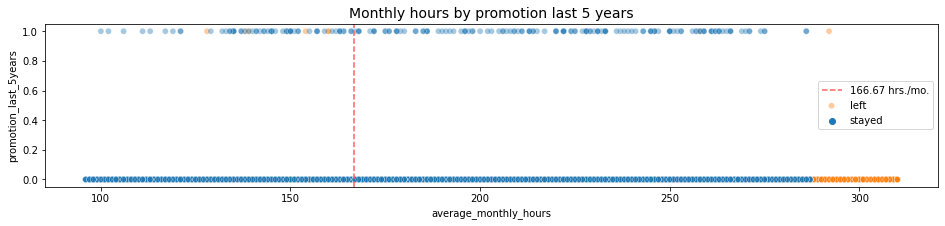

In [28]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16, 3))
sns.scatterplot(data=df, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

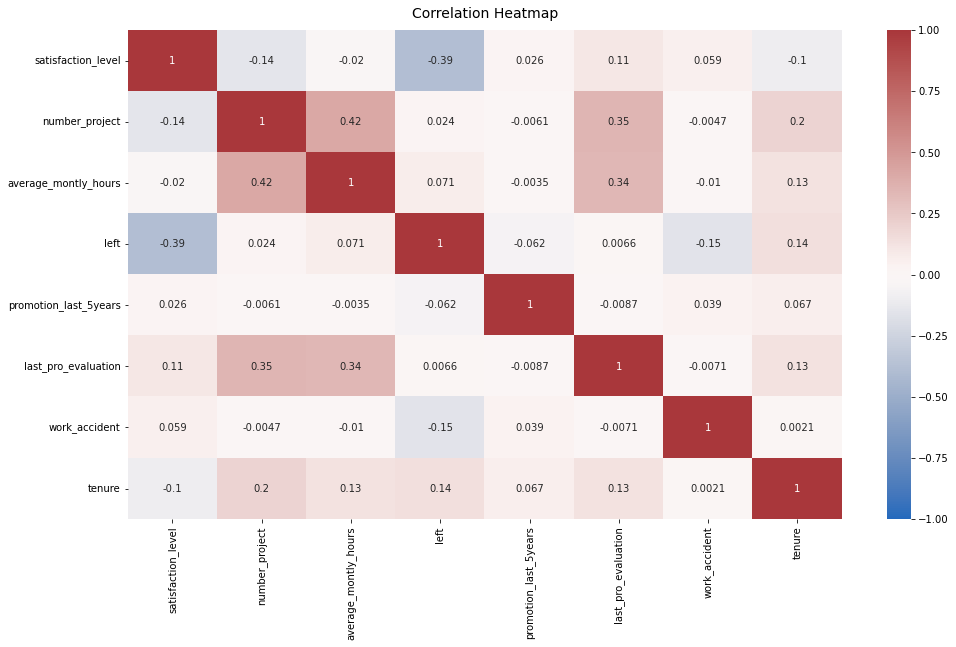

In [92]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df0.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

# Modeling Approach A: Logistic Regression Model

In [93]:
### YOUR CODE HERE ###
## Transform categorical variables into numerical
### Salary

df_enc = df.copy()
df_enc['salary'] = (df_enc['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes)

### Department
df_enc = pd.get_dummies(df_enc, drop_first=False)

df_enc.head(10)

,satisfaction_level,number_project,average_montly_hours,left,promotion_last_5years,salary,last_pro_evaluation,work_accident,tenure,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,2,157,1,0,0,0.53,0,3,0,0,0,0,0,0,0,1,0,0
2,0.11,7,272,1,0,1,0.88,0,4,0,0,0,0,0,0,0,1,0,0
3,0.72,5,223,1,0,0,0.87,0,5,0,0,0,0,0,0,0,1,0,0
4,0.37,2,159,1,0,0,0.52,0,3,0,0,0,0,0,0,0,1,0,0
5,0.41,2,153,1,0,0,0.50,0,3,0,0,0,0,0,0,0,1,0,0
6,0.10,6,247,1,0,0,0.77,0,4,0,0,0,0,0,0,0,1,0,0
7,0.92,5,259,1,0,0,0.85,0,5,0,0,0,0,0,0,0,1,0,0
8,0.89,5,224,1,0,0,1.00,0,5,0,0,0,0,0,0,0,1,0,0
9,0.42,2,142,1,0,0,0.53,0,3,0,0,0,0,0,0,0,1,0,0
10,0.45,2,135,1,0,0,0.54,0,3,0,0,0,0,0,0,0,1,0,0


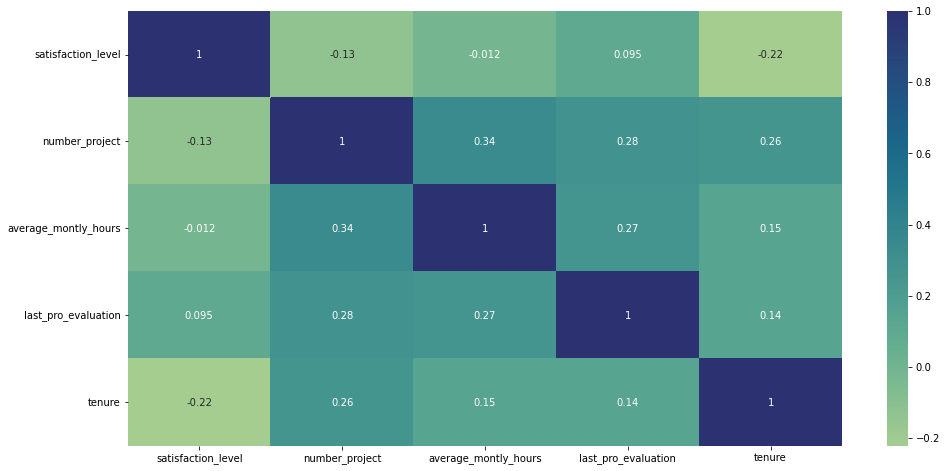

In [94]:
# Create a heatmap to lookat how correlated data are
plt.figure(figsize = (16,8))

sns.heatmap(df_enc[['satisfaction_level','number_project','average_montly_hours','last_pro_evaluation','tenure']].corr(), annot = True, cmap='crest')
heatmap.set_title('Heatmap of the dataset')
plt.show()


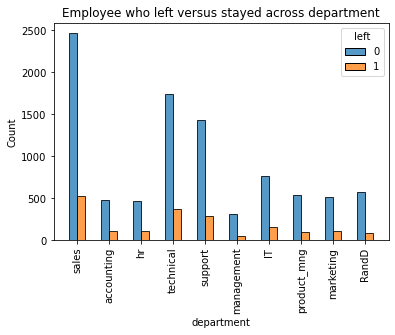

In [95]:
# Salary by department who left and didn't
sns.histplot(data = df, x='department', hue='left', multiple='dodge', shrink = 0.5, color='mr')
plt.title('Employee who left versus stayed across department')
plt.xticks(rotation = 90, fontsize = 10)
plt.show()

In [96]:
# Isolate the outcome variable
y = df_enc['left']
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [97]:
# Select features wanted for analysis
x = df_enc.drop('left', axis = 1)
x.head()

,satisfaction_level,number_project,average_montly_hours,promotion_last_5years,salary,last_pro_evaluation,work_accident,tenure,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,2,157,0,0,0.53,0,3,0,0,0,0,0,0,0,1,0,0
2,0.11,7,272,0,1,0.88,0,4,0,0,0,0,0,0,0,1,0,0
3,0.72,5,223,0,0,0.87,0,5,0,0,0,0,0,0,0,1,0,0
4,0.37,2,159,0,0,0.52,0,3,0,0,0,0,0,0,0,1,0,0
5,0.41,2,153,0,0,0.50,0,3,0,0,0,0,0,0,0,1,0,0


In [98]:
# Split the data to train the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y, random_state = 42)

In [99]:
# Construct a logistic regression model
clf = LogisticRegression(random_state = 42, max_iter=500).fit(x_train, y_train)

In [100]:
# Use the logistic regression model to get predictions on the test set
y_pred = clf.predict(x_test)

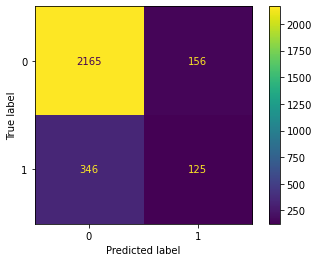

In [101]:
log_cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels = clf.classes_)

log_disp.plot(values_format='')

plt.show()

In [102]:
df_enc['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

In [103]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.27      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



# Tree based modeling

In [104]:
y = df_enc['left']
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [105]:
x = df_enc.drop('left', axis = 1)
x.head()

,satisfaction_level,number_project,average_montly_hours,promotion_last_5years,salary,last_pro_evaluation,work_accident,tenure,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,2,157,0,0,0.53,0,3,0,0,0,0,0,0,0,1,0,0
2,0.11,7,272,0,1,0.88,0,4,0,0,0,0,0,0,0,1,0,0
3,0.72,5,223,0,0,0.87,0,5,0,0,0,0,0,0,0,1,0,0
4,0.37,2,159,0,0,0.52,0,3,0,0,0,0,0,0,0,1,0,0
5,0.41,2,153,0,0,0.50,0,3,0,0,0,0,0,0,0,1,0,0


In [106]:
# Split data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify = y, random_state = 0)

In [107]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [108]:
%%time
tree1.fit(x_train, y_train)

CPU times: user 4.35 s, sys: 1.63 ms, total: 4.35 s
Wall time: 4.43 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [109]:
# Valeurs optimales
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [110]:
# Meilleur score
tree1.best_score_

0.9741265306913758

In [111]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
        
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores 
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }
    
    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    
    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                         }
                        )
    return table

In [112]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.95541,0.912133,0.933245,0.97803,0.974127


### Random forest - Round 1

In [113]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [114]:
%%time
rf1.fit(x_train, y_train) # --> Wall time: ~10min

CPU times: user 11min 42s, sys: 1.69 s, total: 11min 44s
Wall time: 11min 49s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [115]:
# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In [116]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [117]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [118]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

In [119]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

In [120]:
# Check best AUC score on CV
rf1.best_score_

0.9818301014715982

In [121]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [122]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv    0.95541  0.912133  0.933245   0.97803  0.974127
              model  precision   recall        F1  accuracy      auc
0  random forest cv   0.970634  0.91497  0.941925  0.981015  0.98183


In [123]:
def get_scores(model_name:str, model, x_test_data,y_test_data):
    '''
    Generate a table of test scores.
    
    In:
        model_name (string): How you want your model to be named in the output table
        model: A fit GridSearchCV object
        x_test_data: numpy array of x_test data
        y_test_data: numpy array of y_test data
        
    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for yout model
    '''
    
    preds = model.best_estimator_.predict(x_test_data)
    
    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)
    
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
    
    return table

In [124]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1,x_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.967033,0.934183,0.950324,0.983524,0.96386


In [125]:
df2 = df_enc.drop('satisfaction_level', axis=1)
df2.head()

,number_project,average_montly_hours,left,promotion_last_5years,salary,last_pro_evaluation,work_accident,tenure,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,2,157,1,0,0,0.53,0,3,0,0,0,0,0,0,0,1,0,0
2,7,272,1,0,1,0.88,0,4,0,0,0,0,0,0,0,1,0,0
3,5,223,1,0,0,0.87,0,5,0,0,0,0,0,0,0,1,0,0
4,2,159,1,0,0,0.52,0,3,0,0,0,0,0,0,0,1,0,0
5,2,153,1,0,0,0.50,0,3,0,0,0,0,0,0,0,1,0,0


In [126]:
df2["overworked"] = df2["average_montly_hours"]

print("Max hours:", df2["overworked"].max())
print("Min hours:", df2["overworked"].min())

Max hours: 310
Min hours: 96


In [127]:
df2['overworked'] = (df2['overworked'] > 175).astype(int)

df2['overworked'].head()

0    0
2    1
3    1
4    0
5    0
Name: overworked, dtype: int64

In [128]:
df2= df2.drop('average_montly_hours', axis = 1)
df2.head()

,number_project,left,promotion_last_5years,salary,last_pro_evaluation,work_accident,tenure,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,2,1,0,0,0.53,0,3,0,0,0,0,0,0,0,1,0,0,0
2,7,1,0,1,0.88,0,4,0,0,0,0,0,0,0,1,0,0,1
3,5,1,0,0,0.87,0,5,0,0,0,0,0,0,0,1,0,0,1
4,2,1,0,0,0.52,0,3,0,0,0,0,0,0,0,1,0,0,0
5,2,1,0,0,0.50,0,3,0,0,0,0,0,0,0,1,0,0,0


In [129]:
y = df2['left']
y.head()

x = df2.drop('left', axis = 1)
x.head()

,number_project,promotion_last_5years,salary,last_pro_evaluation,work_accident,tenure,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,2,0,0,0.53,0,3,0,0,0,0,0,0,0,1,0,0,0
2,7,0,1,0.88,0,4,0,0,0,0,0,0,0,1,0,0,1
3,5,0,0,0.87,0,5,0,0,0,0,0,0,0,1,0,0,1
4,2,0,0,0.52,0,3,0,0,0,0,0,0,0,1,0,0,0
5,2,0,0,0.50,0,3,0,0,0,0,0,0,0,1,0,0,0


In [130]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify= y, random_state = 42)

In [131]:
tree = RandomForestClassifier(random_state = 0)

cv_params = {'max_depth': [4,6,8, None],
             'min_samples_leaf': [2,5,1],
             'min_samples_split':[2,4,6]
            }

scoring = {'accuracy','precision','recall','f1','roc_auc'}

tree2 = GridSearchCV(tree, cv_params, scoring = scoring, cv=4, refit = 'roc_auc')

In [132]:
%%time
tree2.fit(x_train, y_train)

CPU times: user 59.9 s, sys: 209 ms, total: 1min
Wall time: 1min


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [133]:
# check best parameters
tree2.best_params_

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 6}

In [134]:
tree2.best_score_

0.9712019628363922

In [135]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv    0.95541  0.912133  0.933245   0.97803  0.974127
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.919953  0.885909  0.902543  0.967761  0.971202


In [136]:
# Instantiate model
rf = RandomForestClassifier(random_state = 0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy','precision','recall','f1','roc_auc'}

# Instantiate Grid Search
rf2 = GridSearchCV(rf, cv_params, scoring = scoring, cv= 4, refit='roc_auc')

In [137]:
%%time
rf2.fit(x_train, y_train)

CPU times: user 8min 49s, sys: 1.67 s, total: 8min 51s
Wall time: 8min 53s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [138]:
# Write pickle
write_pickle(path, rf2, 'hr_rf2')

In [139]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [140]:
# check best parameters
tree2.best_params_

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 6}

In [141]:
# check best AUC score on CV
rf2.best_score_

0.971112341529847

In [146]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.919953  0.885909  0.902543  0.967761  0.971202
               model  precision    recall        F1  accuracy       auc
0  random forest2 cv   0.896338  0.906459  0.901303  0.966567  0.971112


In [147]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, x_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.893528,0.908705,0.901053,0.966332,0.943366


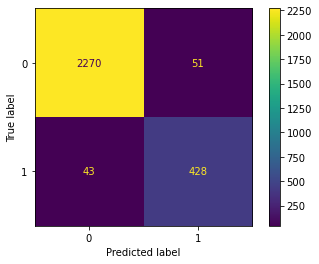

In [148]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(x_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

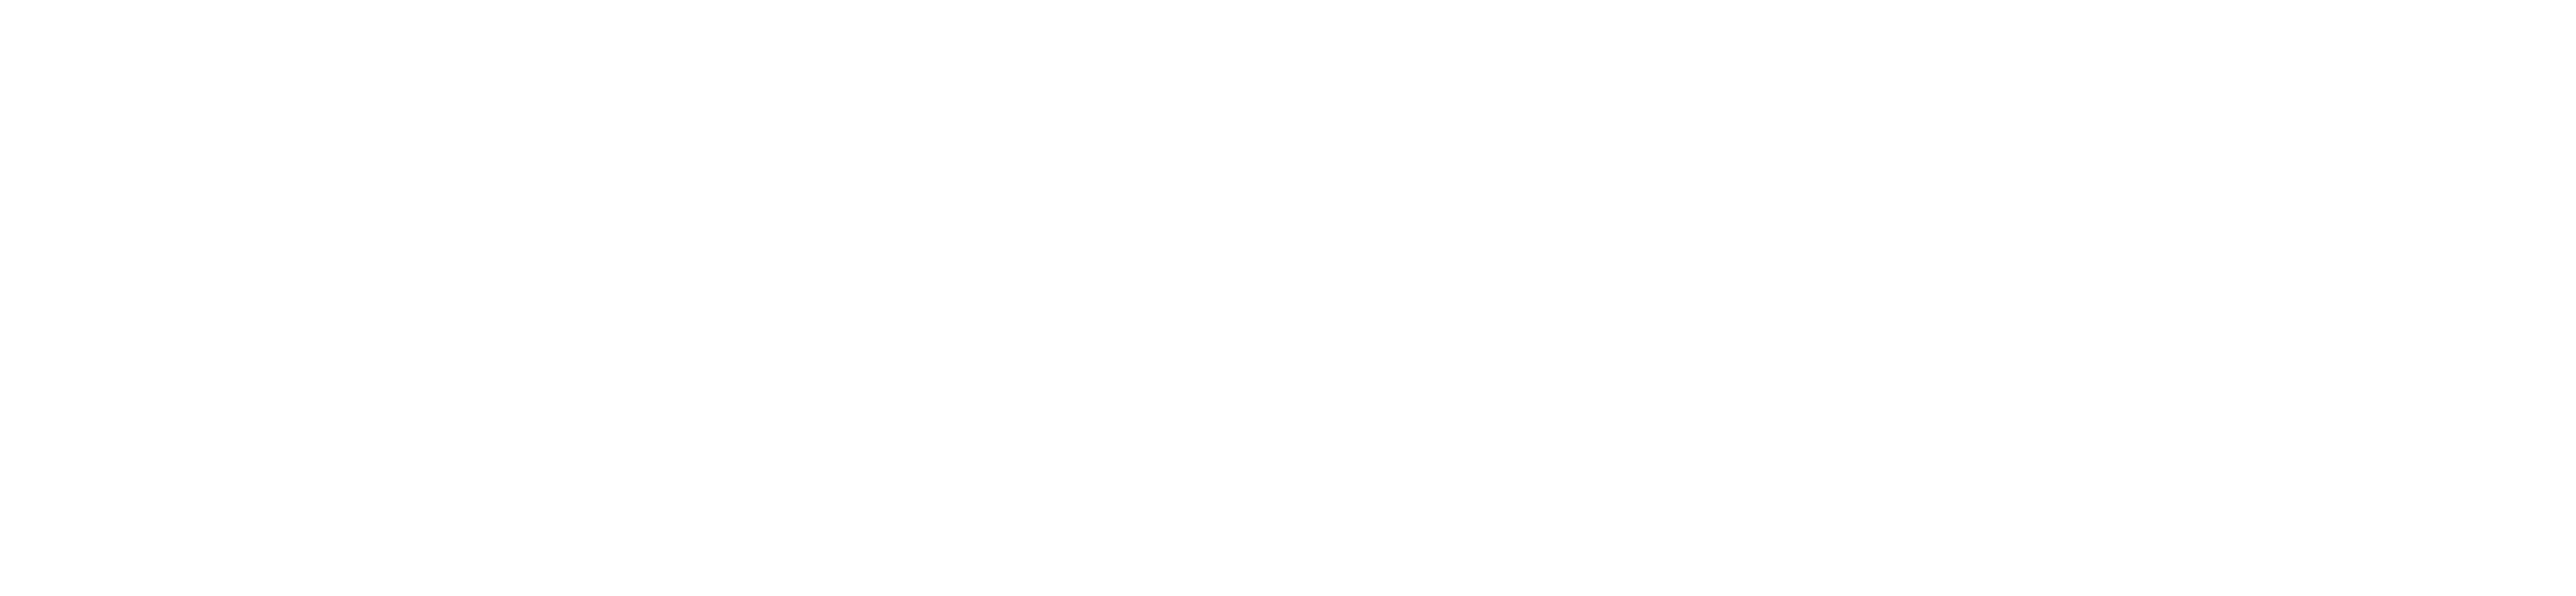

In [150]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=x.columns, class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()

In [151]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=x.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
number_project,0.429134
tenure,0.246034
last_pro_evaluation,0.202845
overworked,0.082276
work_accident,0.015421
salary,0.011081
promotion_last_5years,0.002012
department_sales,0.001716
department_support,0.001409
department_technical,0.001388


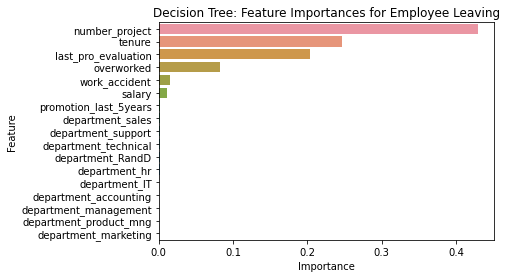

In [152]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

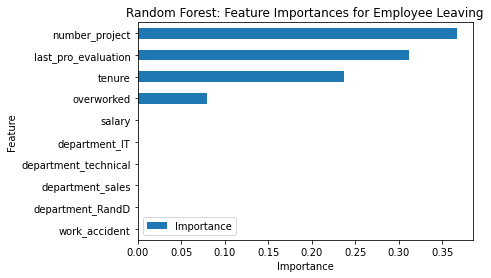

In [154]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = x.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.